In [87]:
import pandas as pd
import numpy as np
sec_30 = pd.read_csv("final30.csv")

In [88]:
sec_30

,temp,hum,occ,CO2,occupancy_level
0,32.694297,38.847172,5,485.535701,3
1,32.712215,38.615442,5,486.271494,3
2,32.722323,38.472166,5,486.167661,3
3,32.726901,38.399065,5,485.646093,3
4,32.728230,38.377858,5,485.129041,3
...,...,...,...,...,...
7189,31.650001,41.348938,6,600.810541,3
7190,31.650001,41.441195,6,604.614729,3
7191,31.650001,41.525044,6,607.766500,3
7192,31.650001,41.588431,6,609.478730,3


In [46]:
X = sec_30[['temp','hum','CO2']]
y = sec_30["occupancy_level"]

In [47]:
column_names=["temp","hum","occ","CO2","occupancy_level"]
def createdataset(data):
    test = pd.DataFrame(columns = column_names)
    train = pd.DataFrame(columns = column_names)
    curr=1
    key = 0
    while(curr<=len(data)):
        print(curr)
        if(key==0):
            if(curr+60>len(data)):
                train = train.append(data[curr:])
            else:
                train = train.append(data[curr:curr+60])
            key=1
            curr+=60
        else:
            if(curr+20>len(data)):
                test = test.append(data[curr:])
            else:
                test = test.append(data[curr:curr+20])
            curr+=20
            key=0
    return train,test

In [48]:
data1_train,data1_test = createdataset(sec_30)

1
61
81
141
161
221
241
301
321
381
401
461
481
541
561
621
641
701
721
781
801
861
881
941
961
1021
1041
1101
1121
1181
1201
1261
1281
1341
1361
1421
1441
1501
1521
1581
1601
1661
1681
1741
1761
1821
1841
1901
1921
1981
2001
2061
2081
2141
2161
2221
2241
2301
2321
2381
2401
2461
2481
2541
2561
2621
2641
2701
2721
2781
2801
2861
2881
2941
2961
3021
3041
3101
3121
3181
3201
3261
3281
3341
3361
3421
3441
3501
3521
3581
3601
3661
3681
3741
3761
3821
3841
3901
3921
3981
4001
4061
4081
4141
4161
4221
4241
4301
4321
4381
4401
4461
4481
4541
4561
4621
4641
4701
4721
4781
4801
4861
4881
4941
4961
5021
5041
5101
5121
5181
5201
5261
5281
5341
5361
5421
5441
5501
5521
5581
5601
5661
5681
5741
5761
5821
5841
5901
5921
5981
6001
6061
6081
6141
6161
6221
6241
6301
6321
6381
6401
6461
6481
6541
6561
6621
6641
6701
6721
6781
6801
6861
6881
6941
6961
7021
7041
7101
7121
7181


In [49]:
data1_train["occ"] = data1_train["occ"].astype(int)
data1_train["occupancy_level"] = data1_train["occupancy_level"].astype(int)

In [50]:
data1_test["occ"] = data1_test["occ"].astype(int)
data1_test["occupancy_level"] = data1_test["occupancy_level"].astype(int)

In [51]:
data1_test.occupancy_level.value_counts()

2    573
3    515
1    431
0    274
Name: occupancy_level, dtype: int64

In [52]:
data1_train.occupancy_level.value_counts()

2    1717
3    1623
1    1164
0     896
Name: occupancy_level, dtype: int64

In [53]:
data1_train.corr()

,temp,hum,occ,CO2,occupancy_level
temp,1.000000,-0.640103,0.424356,0.201767,0.459582
hum,-0.640103,1.000000,-0.610184,-0.665994,-0.589326
occ,0.424356,-0.610184,1.000000,0.707394,0.977419
CO2,0.201767,-0.665994,0.707394,1.000000,0.680741
occupancy_level,0.459582,-0.589326,0.977419,0.680741,1.000000


In [54]:
data1_test.corr()

,temp,hum,occ,CO2,occupancy_level
temp,1.000000,-0.646696,0.398657,0.177625,0.425350
hum,-0.646696,1.000000,-0.615868,-0.659410,-0.569521
occ,0.398657,-0.615868,1.000000,0.711154,0.974710
CO2,0.177625,-0.659410,0.711154,1.000000,0.669133
occupancy_level,0.425350,-0.569521,0.974710,0.669133,1.000000


In [55]:
x_columns = ["hum","CO2","temp"]
y_columns = ["occ"]

In [56]:
X_train,X_test = data1_train[x_columns].to_numpy() , data1_test[x_columns].to_numpy()
y_train,y_test = data1_train["occupancy_level"] , data1_test["occupancy_level"]

In [57]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9331481481481482

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Print the 10-fold cross-validation scores
cv_scores = cross_val_score(knn, X_train, y_train, cv=10,scoring='accuracy')
print(cv_scores)
print('Average 10-Fold CV Score: {:.4f}'.format(np.mean(cv_scores)))

[0.58518519 0.54259259 0.64259259 0.75925926 0.67407407 0.67407407
 0.71851852 0.75555556 0.70925926 0.59814815]
Average 10-Fold CV Score: 0.6659


In [61]:
knn.fit(X_train,y_train) #learning
#prediciton
print("knn Score: ",knn.score(X_test,y_test))
knnscore = knn.score(X_test,y_test)

knn Score:  0.8711656441717791


In [62]:
knn.score(X_test,y_test)

0.8711656441717791

In [63]:
y_pred = knn.predict(X_test)

In [64]:
from sklearn.metrics import classification_report
from sklearn import metrics

# Predict the labels of the test set: y_pred
y_pred = knn.predict(X_test)

# Compute and print the classification report and training and test scores
print('kNN Classification Report: \n{}'.format(classification_report(y_test, y_pred)))
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Accuracy {:.4f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('F1-score ',metrics.f1_score(y_test, y_pred, average='weighted'))

kNN Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       274
           1       0.90      0.71      0.79       431
           2       0.83      0.89      0.86       573
           3       0.89      0.94      0.92       515

    accuracy                           0.87      1793
   macro avg       0.88      0.87      0.87      1793
weighted avg       0.87      0.87      0.87      1793

Training set score: 0.9331
Accuracy 0.8712
F1-score  0.8686342065069352


In [65]:
from sklearn import metrics
k_range = range(1, 40)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.8499721137757947, 0.8522030117122141, 0.8510875627440044, 0.8499721137757947, 0.8471834913552705, 0.8388176240936978, 0.8393753485778026, 0.8354712771890686, 0.8477412158393753, 0.8455103179029559, 0.8482989403234802, 0.8460680423870608, 0.852760736196319, 0.8549916341327384, 0.8572225320691579, 0.8600111544896821, 0.8650306748466258, 0.8644729503625209, 0.8650306748466258, 0.8661461238148355, 0.8700501952035694, 0.8711656441717791, 0.8667038482989403, 0.8694924707194646, 0.8644729503625209, 0.8661461238148355, 0.8639152258784161, 0.8611266034578918, 0.8600111544896821, 0.8577802565532627, 0.8549916341327384, 0.8588957055214724, 0.8577802565532627, 0.8627997769102064, 0.8555493586168432, 0.8561070831009482, 0.8522030117122141, 0.8510875627440044, 0.8499721137757947]


Text(0, 0.5, 'Testing Accuracy')

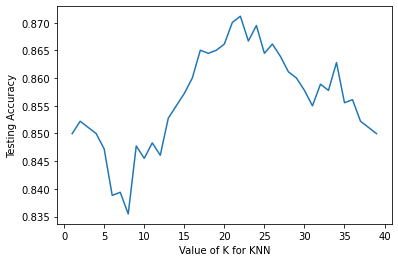

In [66]:
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

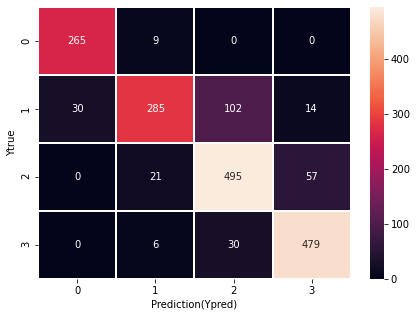

In [67]:
yprediciton2= knn.predict(X_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(CM,annot = True, linewidths=1,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

## SVM

In [68]:
from sklearn.svm import SVC

SVM = SVC(random_state=42)

In [69]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = SVM, X= X_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.6924074074074075
Standart Deviation Accuracies:  0.10219621918331183


In [70]:
SVM.fit(X_train,y_train)  #learning 
#SVM Test 
print ("SVM Accuracy:", SVM.score(X_test,y_test))

SVMscore = SVM.score(X_test,y_test)

SVM Accuracy: 0.8087005019520357


In [71]:
y_pred = SVM.predict(X_test)
print('Accuracy {:.4f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('F1-score ',metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy 0.8087
F1-score  0.8023242109011046


## Decision Trees

In [72]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [73]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = DTC, X= X_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.632037037037037
Standart Deviation Accuracies:  0.1202222735674567


In [74]:
DTC.fit(X_train,y_train) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(X_test,y_test))
DTCscore = DTC.score(X_test,y_test)

Decision Tree Score:  0.848856664807585


In [75]:
max_depth_range = list(range(1, 10))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)    
    score = clf.score(X_test, y_test)
    accuracy.append(score)
print(accuracy)

[0.4774121583937535, 0.588957055214724, 0.6480758505298383, 0.7172336865588399, 0.7936419408812047, 0.8059118795315114, 0.8549916341327384, 0.8873396542108198, 0.8667038482989403]


Text(0, 0.5, 'Testing Accuracy')

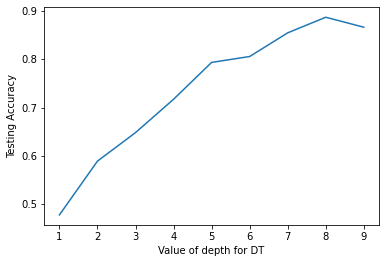

In [76]:
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(max_depth_range, accuracy)
plt.xlabel('Value of depth for DT')
plt.ylabel('Testing Accuracy')

In [77]:
y_pred = DTC.predict(X_test)
print('Accuracy {:.4f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('F1-score ',metrics.f1_score(y_test, y_pred,average = 'weighted'))

Accuracy 0.8489
F1-score  0.8480490509702096


## Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier( random_state=42)

In [79]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = RFC, X= X_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.6846296296296296
Standart Deviation Accuracies:  0.09646370775364302


In [80]:
RFC.fit(X_train,y_train) # learning
print("Random Forest Score: ",RFC.score(X_test,y_test))
RFCscore=RFC.score(X_test,y_test)

Random Forest Score:  0.8789737869492471


In [81]:
y_pred = RFC.predict(X_test)
print('Accuracy {:.4f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('F1-score ',metrics.f1_score(y_test, y_pred,average = 'weighted'))

Accuracy 0.8790
F1-score  0.8780133412466076


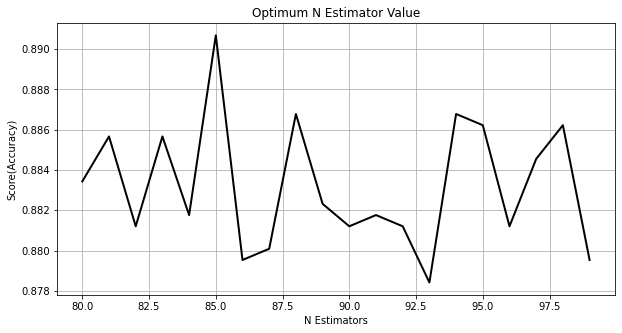

In [82]:
scores = []
for each in range(80,100):
    RFfind = RandomForestClassifier(n_estimators = each)
    RFfind.fit(X_train,y_train)
    scores.append(RFfind.score(X_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(80,100),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

In [83]:

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Fit GaussianNB classifier onto the training data: bayes
bayes = GaussianNB().fit(X_train, y_train)

cv_scores = cross_val_score(bayes, X_train, y_train, cv=10)

print('GaussianNB Cross-Validation Scores')
print(cv_scores)
print('Average 12-Fold CV Score: {:.4f}'.format(np.mean(cv_scores)))

GaussianNB Cross-Validation Scores
[0.33518519 0.30185185 0.53518519 0.59444444 0.69444444 0.62592593
 0.59259259 0.34074074 0.40740741 0.53518519]
Average 12-Fold CV Score: 0.4963


In [84]:
from sklearn.metrics import classification_report

# Predict test set labels: y_pred
y_pred = bayes.predict(X_test)

print('Naive Bayes Classification Report')
print(classification_report(y_test, y_pred))
print('Training set score: {:.4f}'.format(bayes.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(bayes.score(X_test, y_test)))

Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       274
           1       0.47      0.58      0.52       431
           2       0.52      0.23      0.31       573
           3       0.61      0.85      0.71       515

    accuracy                           0.57      1793
   macro avg       0.58      0.60      0.57      1793
weighted avg       0.56      0.57      0.54      1793

Training set score: 0.5919
Test set score: 0.5700


### Knn performed better

In [85]:
X_test[0]

array([-0.85019934,  0.30473635,  1.4581278 ])

In [86]:
import time
for i in range(len(X_test)):
    print("predicted value :",knn.predict([X_test[i]])[0], end = " ")
    print("Actual Value    :",y_test.iloc[i])

predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 2
predicted value : 3 Actual Value    : 2
predicted value : 3 Actual Value    : 2
predicted value : 3 Actual Value    : 2
predicted value : 3 Actual Value    : 2
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3


predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 3 Actual Value    : 3


predicted value : 3 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 2 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3


predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1


predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2
predicted value : 2 Actual Value    : 2


predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0


predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0
predicted value : 0 Actual Value    : 0


predicted value : 3 Actual Value    : 1
predicted value : 3 Actual Value    : 1
predicted value : 3 Actual Value    : 1
predicted value : 3 Actual Value    : 1
predicted value : 3 Actual Value    : 1
predicted value : 2 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 1 Actual Value    : 1
predicted value : 2 Actual Value    : 1
predicted value : 2 Actual Value    : 1


predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
predicted value : 3 Actual Value    : 3
